В этом минипроекте вы поработаете c данными с сайта Яндекс.Метрики.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('step_1_lesson_7.csv')

In [3]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


#### Задача №1

Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика.

In [4]:
df.dtypes

date          object
user_type     object
visits       float64
dtype: object

In [5]:
# Приведем тип даты к datetime

df.date=pd.to_datetime(df.date, format='%Y-%m-%d')

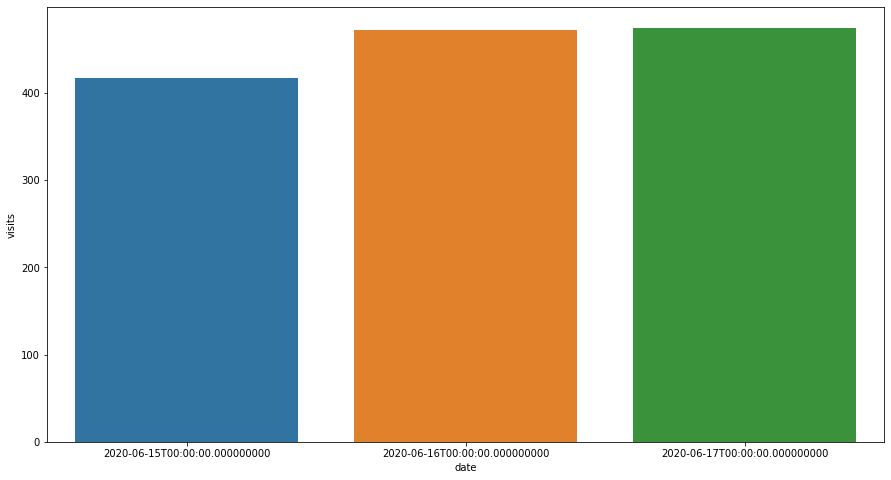

In [6]:
# Строим график посещений людьми

plt.figure(figsize=(15,8))

sns.barplot(x='date', y='visits', data=df.query('user_type =="People"'))

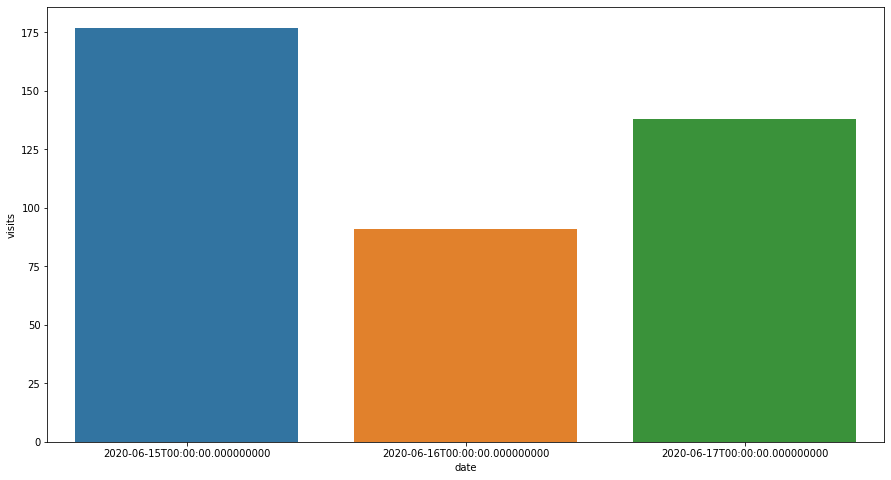

In [7]:
# Строим график посещений роботами

plt.figure(figsize=(15,8))

sns.barplot(x='date', y='visits', data=df.query('user_type =="Robots"'))

#### Задача №2

Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome.

In [8]:
df = pd.read_csv('step_2_lesson_7.csv')

In [9]:
df.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [10]:
df['percent'] = df.visits.div(df.visits.sum()).mul(100).round(0)

In [11]:
df.head()

,date,browser,visits,percent
0,2020-06-15,Google Chrome,354.0,60.0
1,2020-06-15,Firefox,58.0,10.0
2,2020-06-15,Yandex Browser,54.0,9.0
3,2020-06-15,Safari,41.0,7.0
4,2020-06-15,Chrome Mobile,31.0,5.0


#### Задача №3

Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений?

В качестве ответа укажите название браузера.

In [12]:
df = pd.read_csv('step_3_lesson_7.csv')

In [13]:
df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [14]:
df_user_type = df.pivot(index='browser', columns='user_type', values='visits').fillna(0)

In [15]:
df_user_type = df_user_type.assign(
                bot_proportion = df_user_type.Robots / (df_user_type.Robots + df_user_type.People))

In [16]:
df_user_type.sort_values('bot_proportion', ascending=False).head()

user_type,People,Robots,bot_proportion
browser,,,
UCWEB,0.0,4.0,1.000000
Safari,19.0,22.0,0.536585
Firefox,27.0,31.0,0.534483
Chromium,1.0,1.0,0.500000
Opera,11.0,5.0,0.312500


#### Задача №4

Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

In [17]:
df_1 = pd.read_csv('step_4_lesson_7.csv')

In [18]:
df_1.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [19]:
df_1['percent'] = df_1.visits.div(df_1.visits.sum()).mul(100).round(1)

In [20]:
df_1

,date,browser,user_type,visits,percent
0,2020-06-15,Google Chrome,People,250.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,17.5
2,2020-06-15,Yandex Browser,People,47.0,7.9
3,2020-06-15,Firefox,Robots,31.0,5.2
4,2020-06-15,Chrome Mobile,People,31.0,5.2
5,2020-06-15,Firefox,People,27.0,4.5
6,2020-06-15,Safari,Robots,22.0,3.7
7,2020-06-15,Safari,People,19.0,3.2
8,2020-06-15,Mobile Safari,People,15.0,2.5
9,2020-06-15,Opera,People,11.0,1.9


При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. 

Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при помощи VK API себе в личку ВКонтакте. 

In [21]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from df2gspread import df2gspread as d2g

In [22]:
# Specify path to your file with credentials
path_to_credential = 'test-project-1414-434950ebdced.json' 

# Specify name of table in google sheets
table_name = 'Test_tabl_Repin'

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)

In [23]:
gs = gspread.authorize(credentials)
work_sheet = gs.open(table_name)

In [24]:
# Select 1st sheet
sheet1 = work_sheet.sheet1

In [25]:
# Get data in python lists format
data = sheet1.get_all_values()

In [26]:
# Get header from data
headers = data.pop(0)

In [27]:
# Create df
df = pd.DataFrame(data, columns=headers)
df.head()

,client_id,visits
0,109,7
1,209,16
2,108,2
3,208,21


In [28]:
my_mail = 'konstantinovk436@gmail.com'

In [29]:
# Create empty table
table_name = 'A new spreadsheet'
sheet = gs.create(table_name)

# Make it visible to others
sheet.share(my_mail, perm_type='user', role='writer')

In [30]:
sheet = 'Master'
d2g.upload(df_1, table_name, sheet, credentials=credentials, row_names=True)

<Worksheet 'Master' id:206194645>

In [31]:
import vk_api
import random

In [32]:
# Token which you obtained via vk
app_token = 'ef398fd3522f820571379e18ccbb57f4aa07b6e767da2104df35cdd9ec20845a3177ab321a7843581ab70'

In [33]:
# id of the 1st chat
chat_id = 2

In [34]:
# id of my user-receiver
my_id = 95385006

In [35]:
# Initialize session
vk_session = vk_api.VkApi(token=app_token)

In [36]:
# Make it possible to use vk api methods as python methods
vk = vk_session.get_api()

In [37]:
vk.messages.send(
    chat_id=chat_id,
    random_id=random.randint(1, 2 ** 31),
    message='Hello!')

17

In [38]:
# Отправка сообщения в чат группы

vk.messages.send(
    chat_id=chat_id,
    random_id=random.randint(1, 2 ** 31),
    message='https://docs.google.com/spreadsheets/d/1Jbo6j-agh6ldMi9sP4owpxGNxZMlOTNe1ON93GcbYIc/edit?usp=sharing')

18

In [39]:
# Отправка сообщения в личку

vk.messages.send(
    user_id=my_id,
    random_id=random.randint(1, 2 ** 31),
    message='https://docs.google.com/spreadsheets/d/1Jbo6j-agh6ldMi9sP4owpxGNxZMlOTNe1ON93GcbYIc/edit?usp=sharing')

19

Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

In [40]:
# Считываем данные другого аналитика

from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [41]:
df.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [42]:
df_full = df.merge(df_1)

In [43]:
df_full.head()

,date,browser,user_type,users,visits,percent
0,2020-06-15,Google Chrome,People,240.0,250.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,104.0,17.5
2,2020-06-15,Yandex Browser,People,44.0,47.0,7.9
3,2020-06-15,Chrome Mobile,People,30.0,31.0,5.2
4,2020-06-15,Firefox,Robots,29.0,31.0,5.2


In [44]:
# Считаем количество визитов на человека (отношение visits к users) в разрезе по браузеру 
# и значениям Robots/People.

df_full = df_full.assign(proportion = df_full.visits / df_full.users)

In [45]:
df_full.head()

,date,browser,user_type,users,visits,percent,proportion
0,2020-06-15,Google Chrome,People,240.0,250.0,42.1,1.041667
1,2020-06-15,Google Chrome,Robots,104.0,104.0,17.5,1.000000
2,2020-06-15,Yandex Browser,People,44.0,47.0,7.9,1.068182
3,2020-06-15,Chrome Mobile,People,30.0,31.0,5.2,1.033333
4,2020-06-15,Firefox,Robots,29.0,31.0,5.2,1.068966
